In [1]:
import keras
from keras import layers

encoding_dim = 32  

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [2]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 6s 23ms/step - loss: 0.2771 - val_loss: 0.1917
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1720 - val_loss: 0.1543
Epoch 3/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1449 - val_loss: 0.1341
Epoch 4/50
235/235 [==============================] - 7s 29ms/step - loss: 0.1287 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1181 - val_loss: 0.1127
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1109 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1060 - val_loss: 0.1027
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1025 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0999 - val_loss: 0.0975


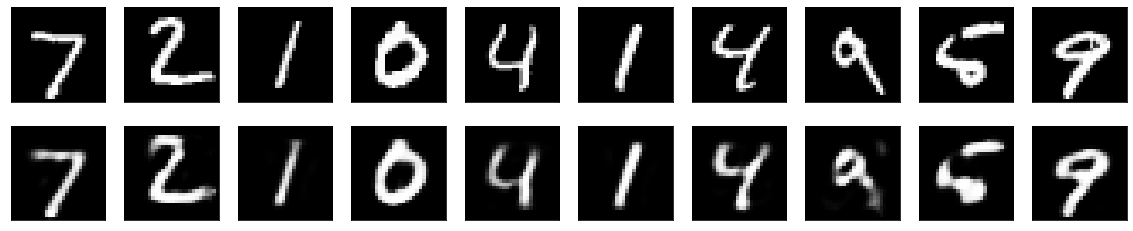

In [3]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()